In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import dendrogram, linkage, ClusterWarning
from warnings import simplefilter
import math

In [5]:
aux = list( [ (1,0,0), (0,1,0), (0,0,1)] )
aux.append( tuple(np.random.random_sample(3,)) )
aux.append( tuple(np.random.random_sample(3,)) )
aux.append( tuple(np.random.random_sample(3,)) )
vetores = np.array(aux)
print(vetores)
centro = vetores.mean(axis=0)
v_centro = vetores - centro


[[1.         0.         0.        ]
 [0.         1.         0.        ]
 [0.         0.         1.        ]
 [0.42633783 0.75598174 0.39424432]
 [0.23048614 0.17093251 0.93346669]
 [0.02598203 0.6058939  0.98142956]]


In [6]:
print('centro','\n',centro)
print( np.allclose(vetores, v_centro+centro))


centro 
 [0.28046767 0.42213469 0.55152343]
True


[[ 0.72726263 -0.68636207]
 [ 0.45594808  0.69188648]
 [-0.60477771 -0.24342006]
 [ 0.27361838  0.21315811]
 [-0.40186359 -0.22144796]
 [-0.45018778  0.2461855 ]]


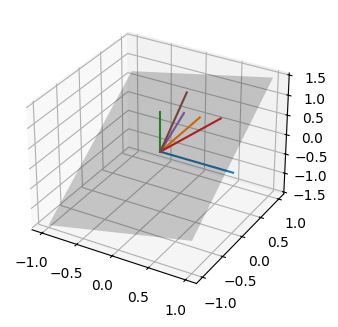

In [7]:
# obter o plano para projeção ortogonal
U,s,Vh = np.linalg.svd(v_centro)
# print('Variancia: ', np.square(s) / np.square(s).sum() )
W2 = Vh.T[:, :2]
v1_plano = Vh.T[:, 0]
v2_plano = Vh.T[:, 1]
projetados2d = v_centro.dot(W2)
print(projetados2d)
# calculando o plano de projeção
menor = np.min(vetores,axis=0)-1
maior = np.min(vetores,axis=0)+1
x1s = np.linspace(menor[0], maior[0], 10)
y1s = np.linspace(menor[1], maior[1], 10)
z1s = np.linspace(menor[2], maior[2], 10)
C = Vh
R = C.T.dot(C)
x1, x2 = np.meshgrid(x1s, y1s)
z = (R[0, 2] * x1 + R[1, 2] * x2) / (1 - R[2, 2])
#
# tentando visualizar as projeções no espaço 3d
fig = plt.figure(figsize=(6, 3.8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x1, x2, z, alpha=0.2, color="k")
# pontos originais
for v in vetores:
    xs = np.linspace(0, v[0], 10)
    ys = np.linspace(0, v[1], 10)
    zs = np.linspace(0, v[2], 10)
    plt.plot(xs,ys,zs=zs)
plt.show()


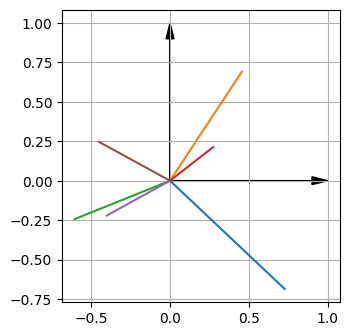

In [8]:
fig = plt.figure(figsize=(6, 3.8))
ax = fig.add_subplot(111, aspect='equal')
# pontos projetados
for v in projetados2d:
    xs = np.linspace(0, v[0], 10)
    ys = np.linspace(0, v[1], 10)
    ax.plot(xs,ys)

ax.arrow(0, 0, 0, 1, head_width=0.05, \
        length_includes_head=True, head_length=0.1, fc='k', ec='k')
ax.arrow(0, 0, 1, 0, head_width=0.05, \
        length_includes_head=True, head_length=0.1, fc='k', ec='k')
ax.grid(True)
plt.show()



In [9]:
def vectorDistance(v1,v2):
    soma = 0
    for i in range(0,len(v1)):
        d = v1[i]-v2[i]
        soma = soma + d*d
    return math.sqrt(soma)


In [10]:
def calcDistance(mat):
    nrows = len(mat)
    ncols = len(mat[0])
    res = np.zeros( (nrows,nrows) )
    for i in range(0,nrows):
        m1 = mat[i]
        for j in range(0,nrows):
            if i!=j:
                m2 = mat[j]
                res[i][j] = vectorDistance(m1,m2)
            else:
                res[i][j] = 0
    return res

In [11]:
d = calcDistance(vetores)
d1 = calcDistance(projetados2d)
print('original')
print(d)
print('projetada')
print(d1)

original
[[0.         1.41421356 1.41421356 1.02763089 1.22177312 1.50964314]
 [1.41421356 0.         1.41421356 0.62987098 1.26958136 1.05792187]
 [1.41421356 1.41421356 0.         1.05840081 0.29456487 0.60673499]
 [1.02763089 0.62987098 1.05840081 0.         0.81939078 0.72635917]
 [1.22177312 1.26958136 0.29456487 0.81939078 0.         0.48302565]
 [1.50964314 1.05792187 0.60673499 0.72635917 0.48302565 0.        ]]
projetada
[[0.         1.40469949 1.40375535 1.00743717 1.22109423 1.50201013]
 [1.40469949 0.         1.41419147 0.51227431 1.25300465 1.00981759]
 [1.40375535 1.41419147 0.         0.98997137 0.20410025 0.51343125]
 [1.00743717 0.51227431 0.98997137 0.         0.80321748 0.72455929]
 [1.22109423 1.25300465 0.20410025 0.80321748 0.         0.47012369]
 [1.50201013 1.00981759 0.51343125 0.72455929 0.47012369 0.        ]]


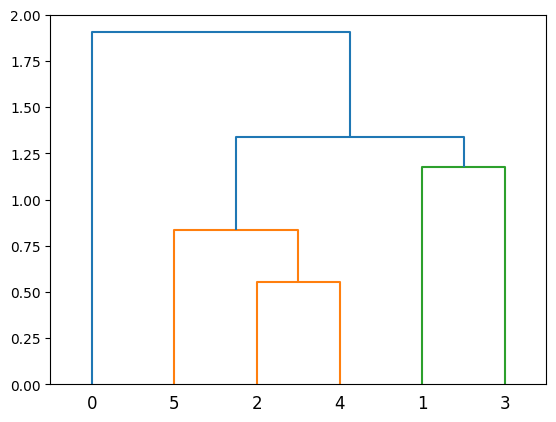

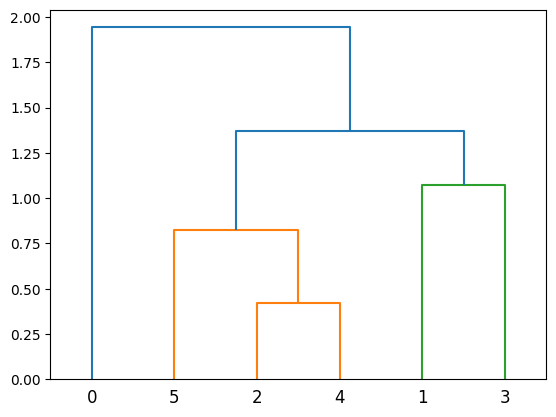

In [12]:
simplefilter("ignore", ClusterWarning)
Z1 = linkage(d, 'single')
fig = plt.figure()
dn = dendrogram(Z1)
plt.show()
Z2 = linkage(d1, 'single')
fig = plt.figure()
dn = dendrogram(Z2)
plt.show()
